In [1]:
!mkdir -p open-images
%cd open-images

/mnt/data/object_detection/open-images


In [2]:
from pycocotools.coco import COCO
from tqdm import tqdm_notebook
import urllib.request
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## 1. Download

Download annotation files:

In [ ]:
# Training bounding boxes (1.11G)
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

# Validating bounding boxes (23.94M)
!wget https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv
    
# Testing bounding boxes (73.89M)
!wget https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv

# Class names of images (11.73K)
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv

Obtain `downloadOI.py` from [learnopencv's tutorial](https://www.learnopencv.com/fast-image-downloader-for-open-images-v4/) to download classes from Open Image v5

In [ ]:
!wget https://raw.githubusercontent.com/spmallick/learnopencv/master/downloadOpenImages/downloadOI.py

In [ ]:
# Run download for Camera and Tripod classes
!python3 downloadOI.py --classes 'Camera,Tripod' --mode train

## 2. Explore the data

#### Label Description

In [3]:
labels = pd.read_csv("class-descriptions-boxable.csv", header=None, names=['LabelName', 'Label'])

In [4]:
# There are 601 classes
len(labels)

601

In [5]:
target_labels = ['Camera', 'Tripod']

In [6]:
subset_labels = labels[labels['Label'].isin(target_labels)]
subset_labels 

,LabelName,Label
370,/m/073bxn,Tripod
498,/m/0dv5r,Camera


#### Train Data

In [7]:
train_data = pd.read_csv("train-annotations-bbox.csv")
train_data = train_data.merge(subset_labels, on='LabelName')
train_data.head(3)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,Label
0,000091f4a275d0fb,xclick,/m/0dv5r,1,0.472857,0.598571,0.217204,0.443011,0,0,0,0,0,Camera
1,0002a1a755d730ca,xclick,/m/0dv5r,1,0.404687,0.715625,0.172917,0.414583,1,0,0,0,0,Camera
2,00034cd6adabef6a,xclick,/m/0dv5r,1,0.755000,0.998125,0.834167,0.999167,1,1,0,0,0,Camera


In [8]:
# There are 6091 unique images
train_data['ImageID'].nunique()

6091

In [9]:
train_data['Label'].value_counts()

Camera    6404
Tripod    1446
Name: Label, dtype: int64

In [10]:
# There are 142 images having both classes
train_data.groupby('ImageID')['Label'].nunique().value_counts()

1    5949
2     142
Name: Label, dtype: int64

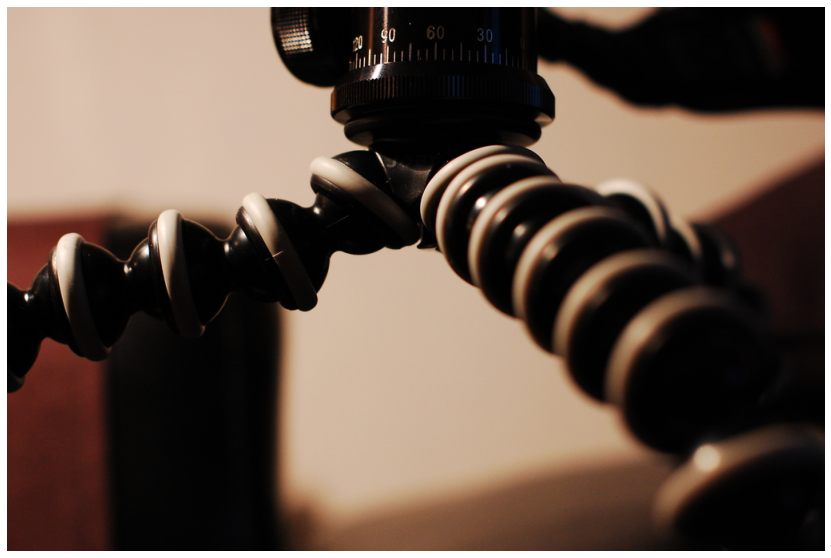

In [11]:
# Get if of images having 2 labels
label_per_img = train_data.groupby('ImageID')['Label'].nunique()
img_2labels = label_per_img.index[label_per_img == 2].tolist()

# Display a random image having 2 labels
im = cv2.imread(f"train/Tripod/{np.random.choice(img_2labels)}.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

#### Validation Data

In [12]:
validation_data = pd.read_csv("validation-annotations-bbox.csv")
validation_data = validation_data.merge(subset_labels, on='LabelName')

In [13]:
validation_data['ImageID'].nunique()

166

In [14]:
validation_data['Label'].value_counts()

Camera    153
Tripod     40
Name: Label, dtype: int64